# Kaggle - Credit Card Approval Prediction
* https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

In [1]:
import copy
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
raw_data_a = pd.read_csv('./Data/application_record.csv')
raw_data_a.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


## Data Description - application_record.csv
* CODE_GENDER : 성별
* FLAG_OWN_CAR : 차량 소유 여부
* FLAG_OWN_REALTY : 부동산 소유 여부
* CNT_CHILDREN : : 자녀 수
* AMT_INCOME_TOTAL : 연간 총 소득(연봉)
* NAME_INCOME_TYPE : 자금 출처(직업) - Working : 근로자, Commercial associate : 상업, etc...
* NAME_EDUCATION_TYPE : 최종 학력
* NAME_FAMILY_STATUS : 혼인 여부
* NAME_HOUSING_TYPE : 거주 상태
* DAYS_BIRTH : 태어난 후로부터 지난 일수 - ex) -12005 : 태어난지 12005일
* DAYS_EMPLOYED : 고용 시작일로부터 지난 일수 - ex) -4542 : 일을 시작한지 4542일 +)양수 값은 실업자를 의미
* FLAG_MOBIL : 가입할 때 휴대폰 번호를 기입했는지 여부 - ex) 0 : 휴대폰번호 제공을 거부한 사람
* FLAG_WORK_PHONE : 가입할 때 직장 전화번호를 기입했는지 여부
* FLAG_PHONE : 가입할 때 집 전화번호를 기입했는지 여부
* FLAG_EMAIL : 가입할 때 이메일 주소를 기입했는지 여부
* OCCUPATION_TYPE : 직업 종류
* CNT_FAM_MEMBERS : 가족 구성원 수

In [3]:
raw_data_c = pd.read_csv('./Data/credit_record.csv')
raw_data_c.head(3)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0


## Data Description - credit.csv
* MONTHS_BALANCE  
0  : 현재  
-1 : 1달 전  
-2 : 2달 전  
...  
* STATUS : 연체 상태  
X : 해당 월에 대출 없음  
C : 정상 상환  
숫자 : 월 ex) 0 : 1달 미만, 1 : 1달, 3 : 3달 ... 5 : 5달  

In [4]:
print('application',raw_data_a.shape)
print('credit',raw_data_c.shape)

application (438557, 18)
credit (1048575, 3)


In [5]:
data_a = copy.deepcopy(raw_data_a)
data_c = copy.deepcopy(raw_data_c)
print('application',data_a.shape)
print('credit',data_c.shape)

application (438557, 18)
credit (1048575, 3)


## Merge

In [6]:
data_c.head(3)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0


In [7]:
data_c['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [8]:
data_c.loc[(data_c['STATUS'] == 'X') | (data_c['STATUS'] == 'C'), 'STATUS'] = 0
data_c['STATUS'].value_counts()

0    651261
0    383120
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [9]:
data_c['STATUS'] = data_c['STATUS'].astype(int)
data_c['STATUS'].value_counts()

0    1034381
1      11090
5       1693
2        868
3        320
4        223
Name: STATUS, dtype: int64

In [10]:
group_c = data_c.groupby('ID').mean().reset_index()
group_c.head(3)

,ID,MONTHS_BALANCE,STATUS
0,5001711,-1.5,0.0
1,5001712,-9.0,0.0
2,5001713,-10.5,0.0


In [11]:
group_c.loc[group_c['STATUS'] > 0, 'STATUS'] = 1
group_c['STATUS'].value_counts()

0.0    40635
1.0     5350
Name: STATUS, dtype: int64

In [12]:
df = pd.merge(group_c, data_a, how= 'left', on= 'ID')
df.head(3)

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5001711,-1.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001712,-9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001713,-10.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print(df.shape)

(45985, 20)


# Missing Data

In [14]:
df.isna().sum()

ID                         0
MONTHS_BALANCE             0
STATUS                     0
CODE_GENDER             9528
FLAG_OWN_CAR            9528
FLAG_OWN_REALTY         9528
CNT_CHILDREN            9528
AMT_INCOME_TOTAL        9528
NAME_INCOME_TYPE        9528
NAME_EDUCATION_TYPE     9528
NAME_FAMILY_STATUS      9528
NAME_HOUSING_TYPE       9528
DAYS_BIRTH              9528
DAYS_EMPLOYED           9528
FLAG_MOBIL              9528
FLAG_WORK_PHONE         9528
FLAG_PHONE              9528
FLAG_EMAIL              9528
OCCUPATION_TYPE        20851
CNT_FAM_MEMBERS         9528
dtype: int64

In [15]:
df_null = df.isna().sum()
(df_null/len(df)*100).sort_values(ascending= False)

OCCUPATION_TYPE        45.343047
NAME_FAMILY_STATUS     20.719800
NAME_HOUSING_TYPE      20.719800
FLAG_EMAIL             20.719800
FLAG_PHONE             20.719800
FLAG_WORK_PHONE        20.719800
FLAG_MOBIL             20.719800
DAYS_EMPLOYED          20.719800
DAYS_BIRTH             20.719800
CNT_FAM_MEMBERS        20.719800
NAME_EDUCATION_TYPE    20.719800
NAME_INCOME_TYPE       20.719800
AMT_INCOME_TOTAL       20.719800
CNT_CHILDREN           20.719800
FLAG_OWN_REALTY        20.719800
FLAG_OWN_CAR           20.719800
CODE_GENDER            20.719800
MONTHS_BALANCE          0.000000
STATUS                  0.000000
ID                      0.000000
dtype: float64

In [16]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64

In [17]:
print('Before remove', df.shape)

df.dropna(inplace= True)
print('After remove', df.shape)

Before remove (45985, 20)
After remove (25134, 20)


# Duplicated Data

In [18]:
df.duplicated().sum()

0

# Data Index

In [19]:
pd.set_option('display.max_columns',None)
df.head(3)

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
3233,5008806,-14.5,0.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3234,5008808,-2.0,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
3235,5008809,-24.0,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


In [20]:
df['STATUS'].value_counts()

0.0    22045
1.0     3089
Name: STATUS, dtype: int64

In [21]:
df['CNT_CHILDREN'].value_counts()

0.0     15908
1.0      6118
2.0      2715
3.0       312
4.0        57
5.0        18
14.0        3
7.0         2
19.0        1
Name: CNT_CHILDREN, dtype: int64

In [22]:
df.drop(['ID','MONTHS_BALANCE'], axis= 1, inplace= True)
df.rename(columns= {'STATUS':'Target',
                    'CODE_GENDER':'Gender',
                    'FLAG_OWN_CAR':'Car',
                    'FLAG_OWN_REALTY':'Realty',
                    'CNT_CHILDREN':'Number_of_Child',
                    'AMT_INCOME_TOTAL':'Income',
                    'NAME_INCOME_TYPE':'Source_of_Income',
                    'NAME_EDUCATION_TYPE':'Education',
                    'NAME_FAMILY_STATUS':'Family_Status',
                    'NAME_HOUSING_TYPE':'House_Type',
                    'DAYS_BIRTH':'Days_Birth',
                    'DAYS_EMPLOYED':'Days_Employed',
                    'FLAG_MOBIL':'Cell_Phone',
                    'FLAG_WORK_PHONE':'Work_Phone',
                    'FLAG_PHONE':'Home_Phone',
                    'FLAG_EMAIL':'Email',
                    'OCCUPATION_TYPE':'Occupation',
                    'CNT_FAM_MEMBERS':'Number_of_Family'}, inplace= True)
df.head(3)

,Target,Gender,Car,Realty,Number_of_Child,Income,Source_of_Income,Education,Family_Status,House_Type,Days_Birth,Days_Employed,Cell_Phone,Work_Phone,Home_Phone,Email,Occupation,Number_of_Family
3233,0.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3234,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
3235,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


# EDA 1


## 1개월 이상 연체율

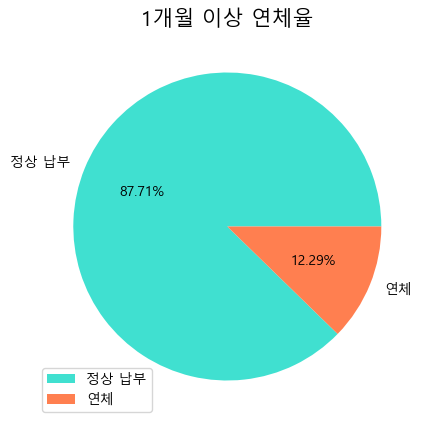

In [23]:
plt.figure(figsize = (10,5))

df_count = df.groupby(['Target']).size()
plt.pie(df_count,
        labels = ['정상 납부','연체'],
        autopct = '%.2f%%',
        colors = ['turquoise','coral'])
plt.title('1개월 이상 연체율', fontsize = 15)

plt.legend(loc= 'lower left')
plt.show()

In [24]:
df.head(3)

,Target,Gender,Car,Realty,Number_of_Child,Income,Source_of_Income,Education,Family_Status,House_Type,Days_Birth,Days_Employed,Cell_Phone,Work_Phone,Home_Phone,Email,Occupation,Number_of_Family
3233,0.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3234,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
3235,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


## Outlier(Boxplot)

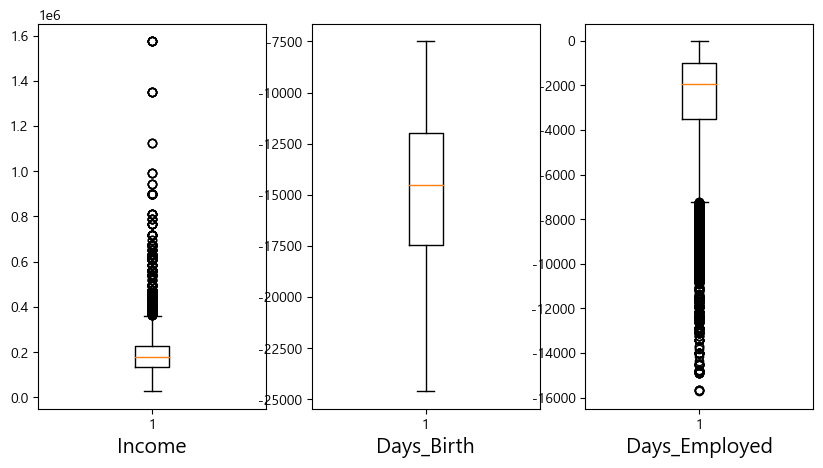

In [25]:
num_index = ['Income','Days_Birth','Days_Employed']

plt.figure(figsize= (10,5))
for i in range(3) :
    plt.subplot(1,3,i+1)
    plt.boxplot(df[num_index[i]])
    plt.xlabel(num_index[i], fontsize= 15)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
plt.show()

# Derived Variable

## Age

In [26]:
df['Age'] = -df['Days_Birth'] // 365
df['Age'] = df['Age'].astype(int)
df.head(3)

,Target,Gender,Car,Realty,Number_of_Child,Income,Source_of_Income,Education,Family_Status,House_Type,Days_Birth,Days_Employed,Cell_Phone,Work_Phone,Home_Phone,Email,Occupation,Number_of_Family,Age
3233,0.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,58
3234,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,52
3235,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,52


## Working Year

In [27]:
df['Working_Year'] = -(df['Days_Employed']) // 365
df['Working_Year'] = df['Working_Year'].astype(int)
df.head(3)

,Target,Gender,Car,Realty,Number_of_Child,Income,Source_of_Income,Education,Family_Status,House_Type,Days_Birth,Days_Employed,Cell_Phone,Work_Phone,Home_Phone,Email,Occupation,Number_of_Family,Age,Working_Year
3233,0.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,58,3
3234,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,52,8
3235,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,52,8


## Remove

In [28]:
df.drop(['Days_Birth','Days_Employed'], axis= 1, inplace= True)
df.head(3)

,Target,Gender,Car,Realty,Number_of_Child,Income,Source_of_Income,Education,Family_Status,House_Type,Cell_Phone,Work_Phone,Home_Phone,Email,Occupation,Number_of_Family,Age,Working_Year
3233,0.0,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1.0,0.0,0.0,0.0,Security staff,2.0,58,3
3234,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,0.0,1.0,1.0,Sales staff,1.0,52,8
3235,0.0,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,0.0,1.0,1.0,Sales staff,1.0,52,8


# EDA 2

In [29]:
df['Target'].value_counts()

0.0    22045
1.0     3089
Name: Target, dtype: int64

## 연속형 변수 Distplot

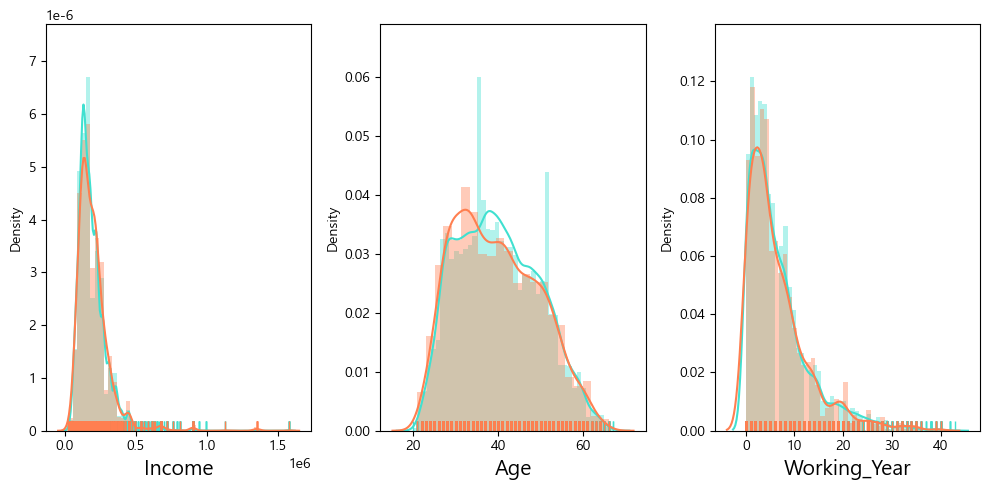

In [30]:
num_index = ['Income','Age','Working_Year']

df_0 = df[df['Target'] == 0]
df_1 = df[df['Target'] == 1]

plt.figure(figsize= (10,5))
for i in range(3) :
    plt.subplot(1,3,i+1)
    sns.distplot(df_0[num_index[i]], hist= True, rug= True, color= 'turquoise')
    sns.distplot(df_1[num_index[i]], hist= True, rug= True, color= 'coral')
    plt.xlabel(num_index[i], fontsize= 15)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
    plt.tight_layout()
plt.show()

### Log 변환

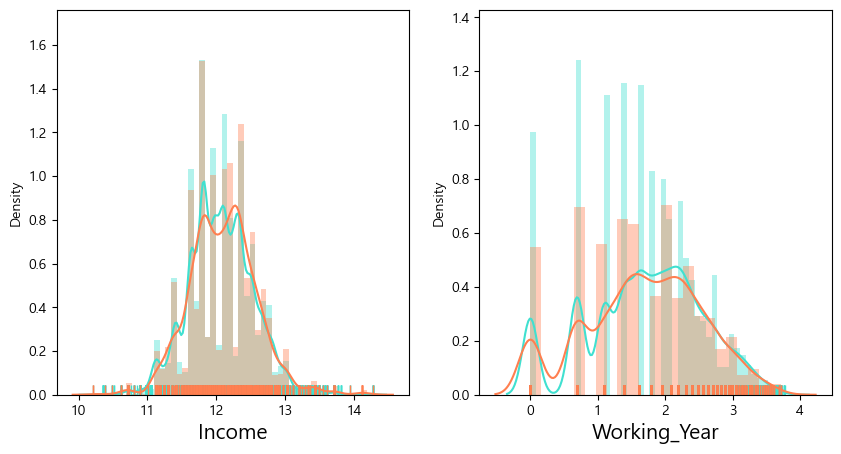

In [31]:
log_index = ['Income','Working_Year']

for i in log_index :
    df[i] = np.log1p(df[i])
    
df_0 = df[df['Target'] == 0]
df_1 = df[df['Target'] == 1]

plt.figure(figsize= (10,5))
for i in range(2) :
    plt.subplot(1,2,i+1)
    sns.distplot(df_0[log_index[i]], hist= True, rug= True, color= 'turquoise')
    sns.distplot(df_1[log_index[i]], hist= True, rug= True, color= 'coral')
    plt.xlabel(log_index[i], fontsize= 15)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
plt.show()

## 범주형 변수 Countplot

In [32]:
df.head(3)

,Target,Gender,Car,Realty,Number_of_Child,Income,Source_of_Income,Education,Family_Status,House_Type,Cell_Phone,Work_Phone,Home_Phone,Email,Occupation,Number_of_Family,Age,Working_Year
3233,0.0,M,Y,Y,0.0,11.630717,Working,Secondary / secondary special,Married,House / apartment,1.0,0.0,0.0,0.0,Security staff,2.0,58,1.386294
3234,0.0,F,N,Y,0.0,12.506181,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,0.0,1.0,1.0,Sales staff,1.0,52,2.197225
3235,0.0,F,N,Y,0.0,12.506181,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1.0,0.0,1.0,1.0,Sales staff,1.0,52,2.197225


In [33]:
obj_index = ['Gender','Car','Realty','Number_of_Child','Source_of_Income','Education','Family_Status','House_Type','Cell_Phone','Work_Phone','Home_Phone','Email','Occupation','Number_of_Family']
len(obj_index)

14

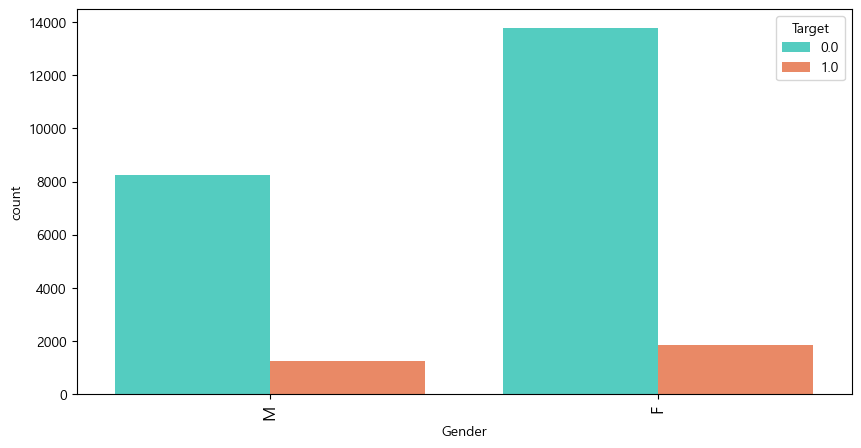

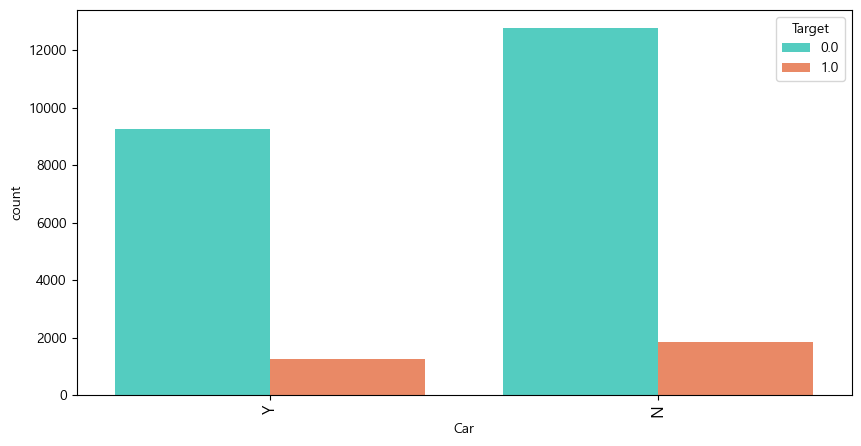

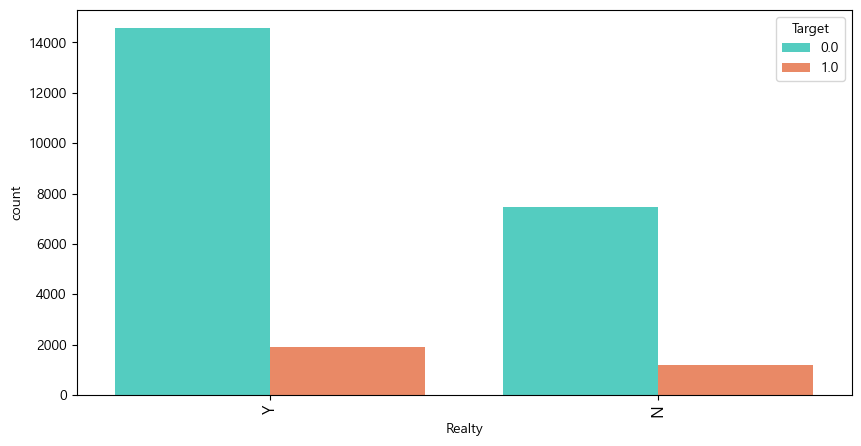

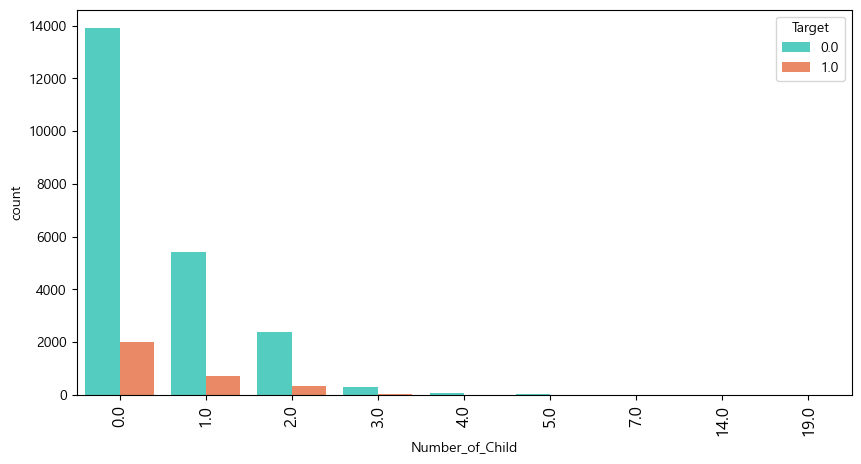

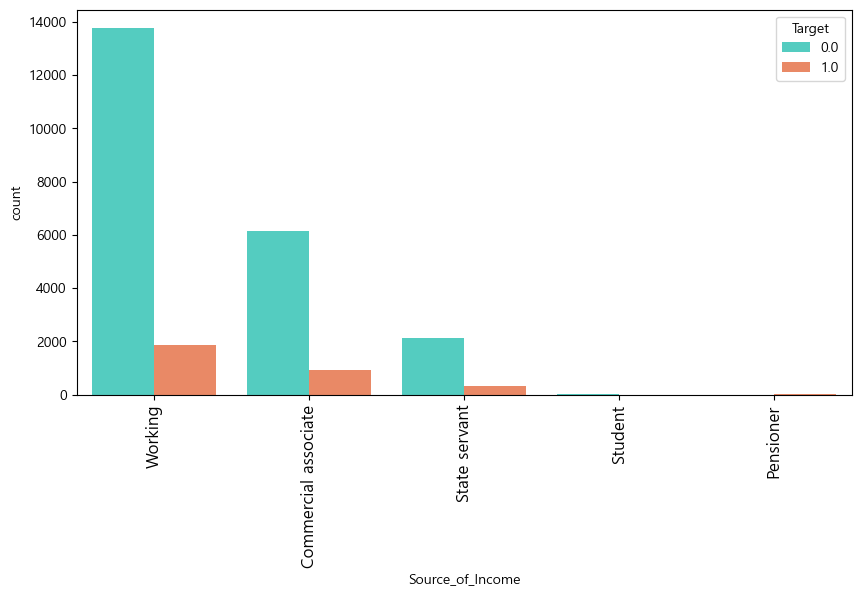

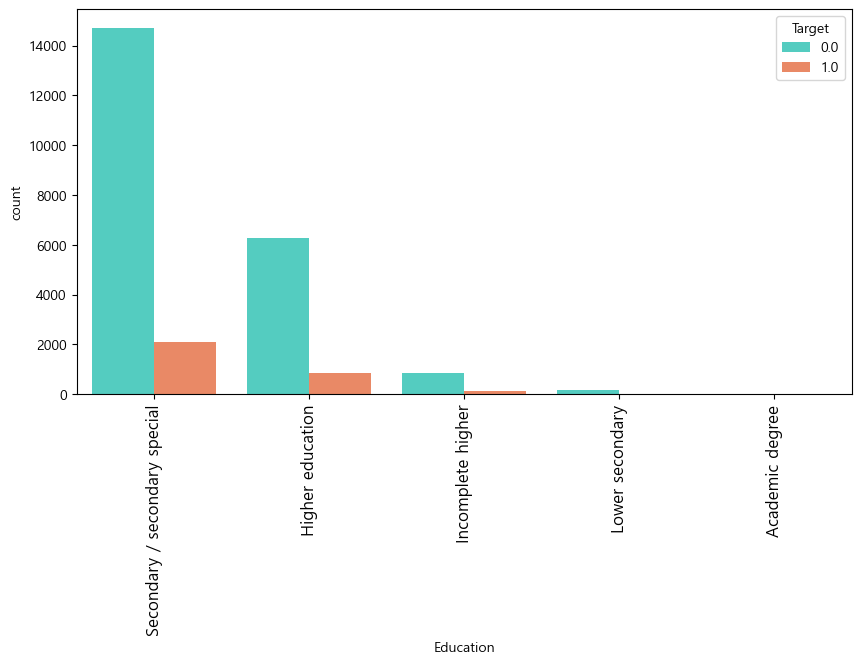

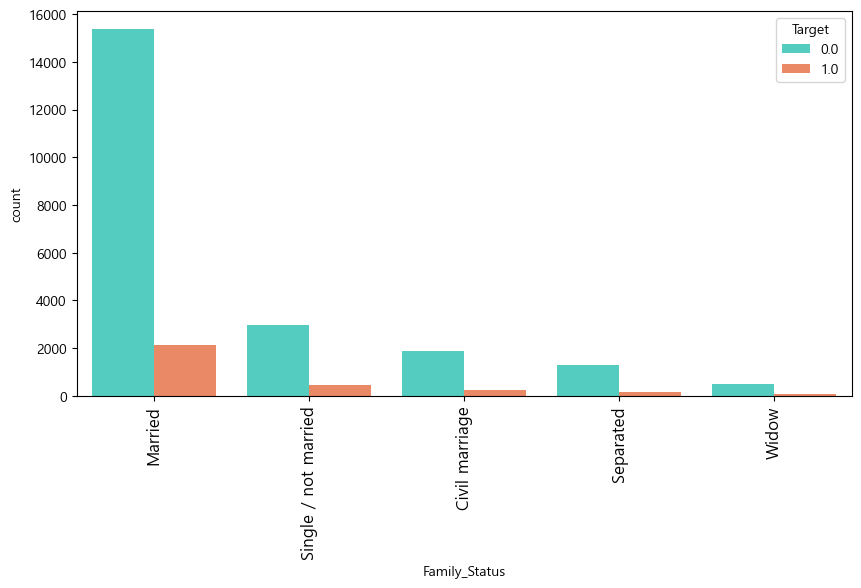

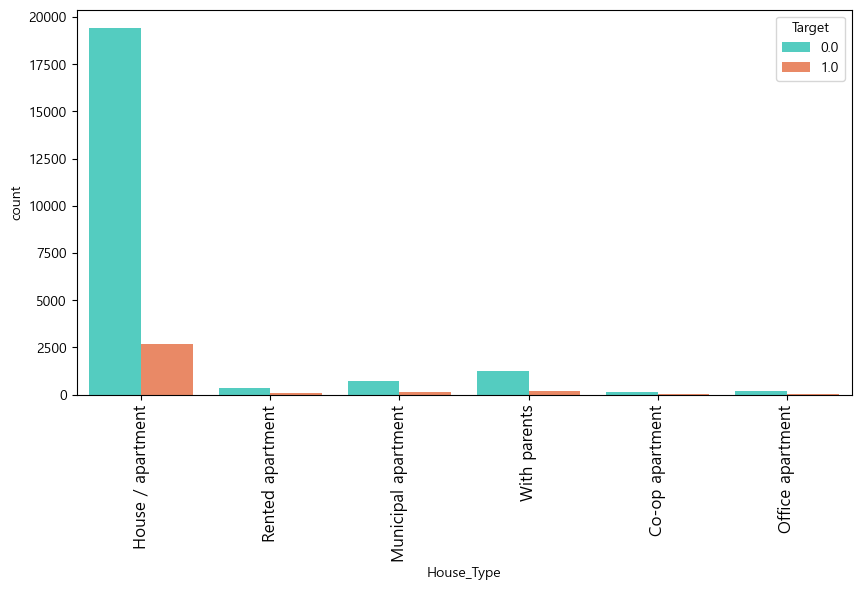

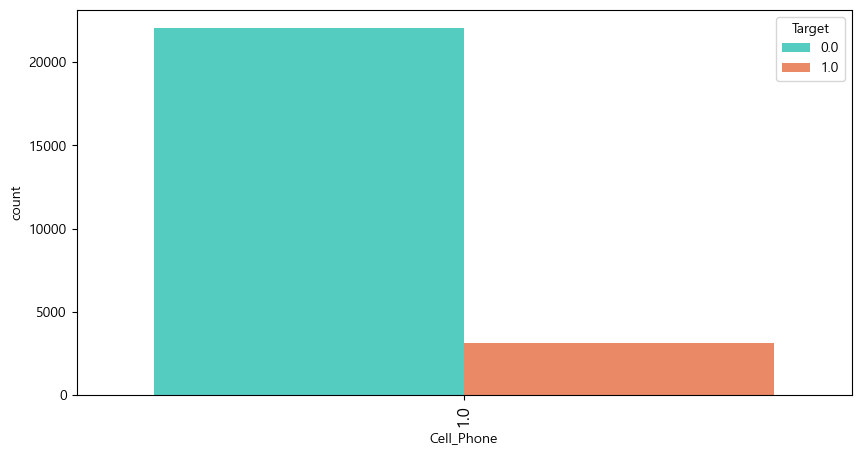

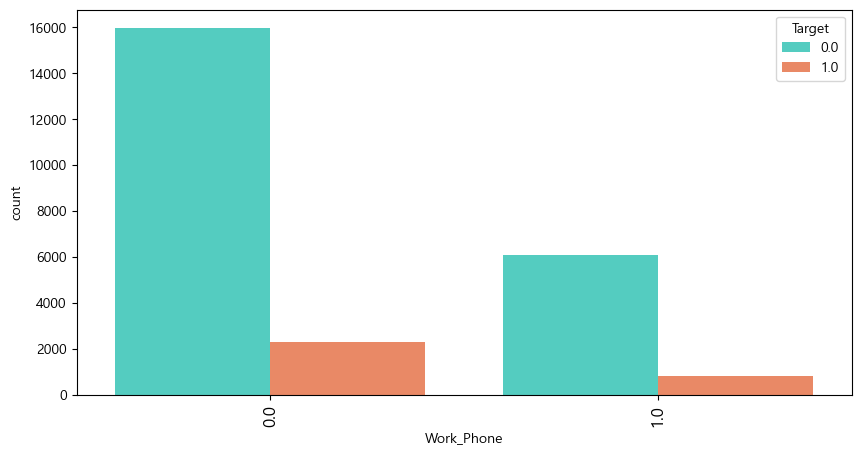

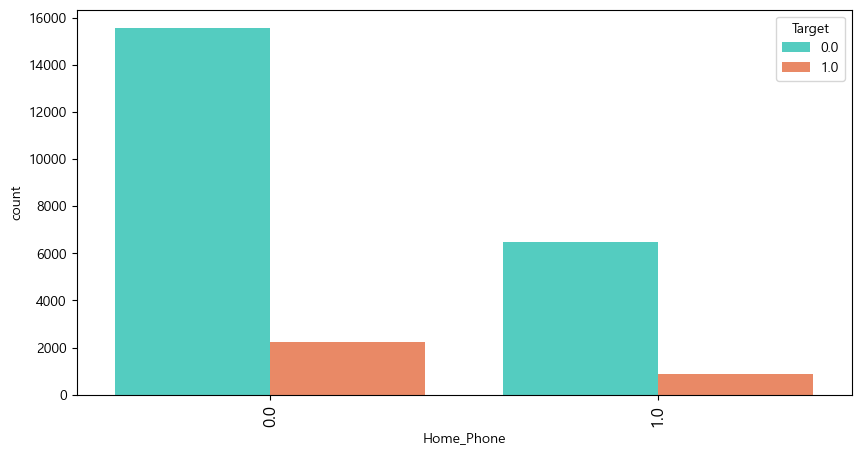

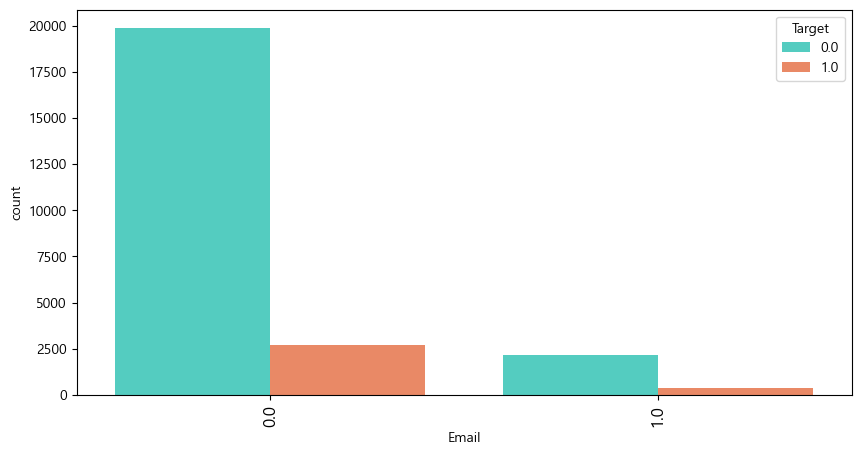

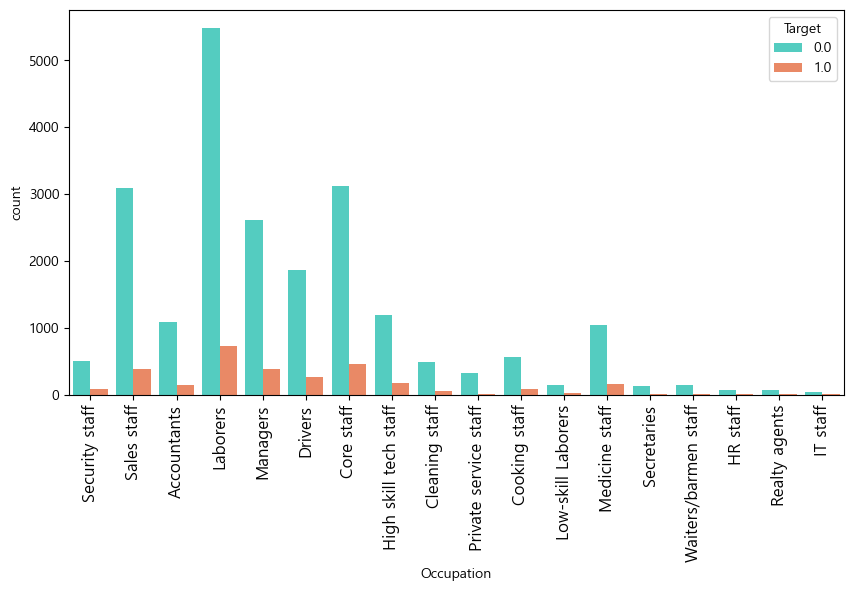

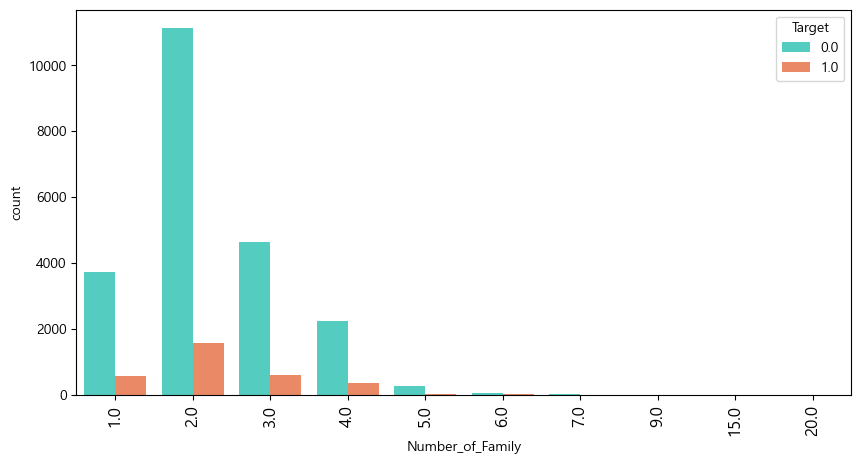

In [34]:
for i in range(len(obj_index)) :
    plt.figure(figsize= (10,5))
    sns.set_palette(sns.color_palette(['turquoise','coral']))
    sns.countplot(x= obj_index[i], hue= 'Target', data= df)
    plt.xticks(fontsize= 12, rotation= 90)
    plt.show()

In [35]:
df.drop('Cell_Phone', axis= 1, inplace= True)
df.head(3)

,Target,Gender,Car,Realty,Number_of_Child,Income,Source_of_Income,Education,Family_Status,House_Type,Work_Phone,Home_Phone,Email,Occupation,Number_of_Family,Age,Working_Year
3233,0.0,M,Y,Y,0.0,11.630717,Working,Secondary / secondary special,Married,House / apartment,0.0,0.0,0.0,Security staff,2.0,58,1.386294
3234,0.0,F,N,Y,0.0,12.506181,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.0,1.0,1.0,Sales staff,1.0,52,2.197225
3235,0.0,F,N,Y,0.0,12.506181,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.0,1.0,1.0,Sales staff,1.0,52,2.197225


## 연령별 연체율

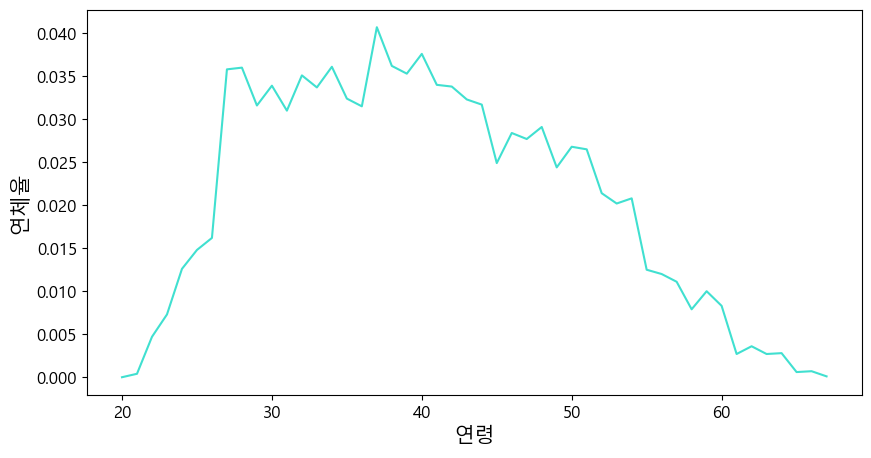

In [36]:
plt.figure(figsize= (10,5))

plt.plot((df.groupby('Age')['Target'].count()/len(df)).round(4))
plt.xlabel('연령', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('연체율', fontsize= 15)
plt.yticks(fontsize= 12)

plt.show()

## Correlation

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Target'),
  Text(0, 1.5, 'Number_of_Child'),
  Text(0, 2.5, 'Income'),
  Text(0, 3.5, 'Work_Phone'),
  Text(0, 4.5, 'Home_Phone'),
  Text(0, 5.5, 'Email'),
  Text(0, 6.5, 'Number_of_Family'),
  Text(0, 7.5, 'Age'),
  Text(0, 8.5, 'Working_Year')])

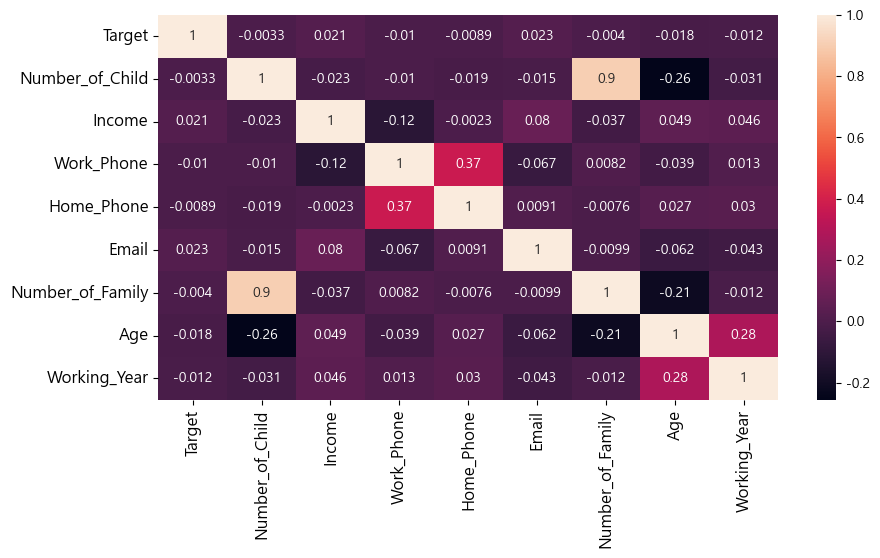

In [37]:
plt.figure(figsize= (10,5))

sns.heatmap(df.corr(), annot= True, annot_kws= {'size':10})
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

In [38]:
df.drop('Number_of_Child', axis= 1, inplace= True)
df.head(3)

,Target,Gender,Car,Realty,Income,Source_of_Income,Education,Family_Status,House_Type,Work_Phone,Home_Phone,Email,Occupation,Number_of_Family,Age,Working_Year
3233,0.0,M,Y,Y,11.630717,Working,Secondary / secondary special,Married,House / apartment,0.0,0.0,0.0,Security staff,2.0,58,1.386294
3234,0.0,F,N,Y,12.506181,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.0,1.0,1.0,Sales staff,1.0,52,2.197225
3235,0.0,F,N,Y,12.506181,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.0,1.0,1.0,Sales staff,1.0,52,2.197225


# Feature Engineering

In [39]:
df['Gender'] = np.where(df['Gender'] == 'M', 1, 0)
df['Car'] = np.where(df['Car'] == 'N', 0, 1)
df['Realty'] = np.where(df['Realty'] == 'N', 0, 1)

df.head(3)

,Target,Gender,Car,Realty,Income,Source_of_Income,Education,Family_Status,House_Type,Work_Phone,Home_Phone,Email,Occupation,Number_of_Family,Age,Working_Year
3233,0.0,1,1,1,11.630717,Working,Secondary / secondary special,Married,House / apartment,0.0,0.0,0.0,Security staff,2.0,58,1.386294
3234,0.0,0,0,1,12.506181,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.0,1.0,1.0,Sales staff,1.0,52,2.197225
3235,0.0,0,0,1,12.506181,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.0,1.0,1.0,Sales staff,1.0,52,2.197225


In [40]:
df['Work_Phone'].value_counts()

0.0    18252
1.0     6882
Name: Work_Phone, dtype: int64

In [41]:
df = df.astype({'Target':'int',
                'Work_Phone':'int',
                'Home_Phone':'int',
                'Email':'int'})
df.head(3)

,Target,Gender,Car,Realty,Income,Source_of_Income,Education,Family_Status,House_Type,Work_Phone,Home_Phone,Email,Occupation,Number_of_Family,Age,Working_Year
3233,0,1,1,1,11.630717,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,58,1.386294
3234,0,0,0,1,12.506181,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,52,2.197225
3235,0,0,0,1,12.506181,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,52,2.197225


# Target, Features

In [42]:
X = df.drop('Target', axis= 1)
Y = df['Target']
print(X.shape, Y.shape)

(25134, 15) (25134,)


# Encoding

In [43]:
X_dummy = pd.get_dummies(X)
print(X_dummy.shape, Y.shape)

(25134, 49) (25134,)


# Over Sampling

In [44]:
Y.value_counts()

0    22045
1     3089
Name: Target, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
sm = SMOTE(sampling_strategy= 0.5)
X_os, Y_os = sm.fit_resample(X_dummy, Y)
print(X_os.shape, Y_os.shape)
print(Y_os.value_counts())

(33067, 49) (33067,)
0    22045
1    11022
Name: Target, dtype: int64


# Data Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# train / test
X_train, X_test, Y_train, Y_test = train_test_split(X_os, Y_os,
                                                    test_size= 0.2,
                                                    random_state= 7)
# train / val
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                  test_size= 0.2,
                                                  random_state= 7)

# Scaling

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [50]:
X_train.head(3)

,Gender,Car,Realty,Income,Work_Phone,Home_Phone,Email,Number_of_Family,Age,Working_Year,Source_of_Income_Commercial associate,Source_of_Income_Pensioner,Source_of_Income_State servant,Source_of_Income_Student,Source_of_Income_Working,Education_Academic degree,Education_Higher education,Education_Incomplete higher,Education_Lower secondary,Education_Secondary / secondary special,Family_Status_Civil marriage,Family_Status_Married,Family_Status_Separated,Family_Status_Single / not married,Family_Status_Widow,House_Type_Co-op apartment,House_Type_House / apartment,House_Type_Municipal apartment,House_Type_Office apartment,House_Type_Rented apartment,House_Type_With parents,Occupation_Accountants,Occupation_Cleaning staff,Occupation_Cooking staff,Occupation_Core staff,Occupation_Drivers,Occupation_HR staff,Occupation_High skill tech staff,Occupation_IT staff,Occupation_Laborers,Occupation_Low-skill Laborers,Occupation_Managers,Occupation_Medicine staff,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Waiters/barmen staff
209,1,1,1,11.967187,0,1,0,4.000000,35,2.484907,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
31942,0,0,1,12.321171,0,0,0,2.000000,58,2.232529,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30850,0,0,1,11.987811,0,0,0,1.392473,23,1.299097,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [51]:
ss = StandardScaler()
ms = MinMaxScaler()

ss_col = ['Income','Working_Year']
X_train[ss_col] = ss.fit_transform(X_train[ss_col])
X_val[ss_col] = ss.transform(X_val[ss_col])
X_test[ss_col] = ss.transform(X_test[ss_col])

ms_col = ['Number_of_Family','Age']
X_train[ms_col] = ms.fit_transform(X_train[ms_col])
X_val[ms_col] = ms.transform(X_val[ms_col])
X_test[ms_col] = ms.transform(X_test[ms_col])

X_train.head(3)

,Gender,Car,Realty,Income,Work_Phone,Home_Phone,Email,Number_of_Family,Age,Working_Year,Source_of_Income_Commercial associate,Source_of_Income_Pensioner,Source_of_Income_State servant,Source_of_Income_Student,Source_of_Income_Working,Education_Academic degree,Education_Higher education,Education_Incomplete higher,Education_Lower secondary,Education_Secondary / secondary special,Family_Status_Civil marriage,Family_Status_Married,Family_Status_Separated,Family_Status_Single / not married,Family_Status_Widow,House_Type_Co-op apartment,House_Type_House / apartment,House_Type_Municipal apartment,House_Type_Office apartment,House_Type_Rented apartment,House_Type_With parents,Occupation_Accountants,Occupation_Cleaning staff,Occupation_Cooking staff,Occupation_Core staff,Occupation_Drivers,Occupation_HR staff,Occupation_High skill tech staff,Occupation_IT staff,Occupation_Laborers,Occupation_Low-skill Laborers,Occupation_Managers,Occupation_Medicine staff,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Waiters/barmen staff
209,1,1,1,-0.227943,0,1,0,0.214286,0.304348,0.918457,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
31942,0,0,1,0.549734,0,0,0,0.071429,0.804348,0.619332,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30850,0,0,1,-0.182633,0,0,0,0.028034,0.043478,-0.486993,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Modeling

## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt_model = DecisionTreeClassifier(random_state= 7)
dt_model.fit(X_train, Y_train)

print('Score in Train data set : {:.4f}'.format(dt_model.score(X_train, Y_train)))
print('Score in Validation data set : {:.4f}'.format(dt_model.score(X_val, Y_val)))

Score in Train data set : 0.9365
Score in Validation data set : 0.8584


## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_model = RandomForestClassifier(random_state= 7)
rf_model.fit(X_train, Y_train)

print('Score in Train data set : {:.4f}'.format(rf_model.score(X_train, Y_train)))
print('Score in Validation data set : {:.4f}'.format(rf_model.score(X_val, Y_val)))

Score in Train data set : 0.9365
Score in Validation data set : 0.8866


## Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gb_model = GradientBoostingClassifier(random_state= 7)
gb_model.fit(X_train, Y_train)

print('Score in Train data set : {:.4f}'.format(gb_model.score(X_train, Y_train)))
print('Score in Validation data set : {:.4f}'.format(gb_model.score(X_val, Y_val)))

Score in Train data set : 0.7577
Score in Validation data set : 0.7413


## XGBoost

In [58]:
from xgboost import XGBClassifier

In [59]:
xgb_model = XGBClassifier(random_state= 7)
xgb_model.fit(X_train, Y_train)

print('Score in Train data set : {:.4f}'.format(xgb_model.score(X_train, Y_train)))
print('Score in Validation data set : {:.4f}'.format(xgb_model.score(X_val, Y_val)))

Score in Train data set : 0.8947
Score in Validation data set : 0.8736


## Support Vector Machine

In [60]:
from sklearn.svm import SVC

In [61]:
svm_model = SVC(random_state= 7)
svm_model.fit(X_train, Y_train)

print('Score in Train data set : {:.4f}'.format(svm_model.score(X_train, Y_train)))
print('Score in Validation data set : {:.4f}'.format(svm_model.score(X_val, Y_val)))

Score in Train data set : 0.8179
Score in Validation data set : 0.8057


# Evaluation

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [63]:
models = ['Decision Tree','Random Forest','Gradient Boosting','XGBoost','Support Vector Machine']
train_accuracy = []
val_accuracy = []
precision = []
recall = []
f1 = []

In [64]:
for model in [dt_model, rf_model, gb_model, xgb_model, svm_model] :
    train_accuracy.append(model.score(X_train, Y_train))
    val_accuracy.append(model.score(X_val, Y_val))
    
    val_pred = model.predict(X_val)
    precision.append(precision_score(Y_val, val_pred))
    recall.append(recall_score(Y_val, val_pred))
    f1.append(f1_score(Y_val, val_pred))

In [65]:
result = pd.DataFrame(index= models)
result['Train Accuracy'] = train_accuracy
result['Validation Accuracy'] = val_accuracy
result['Precision'] = precision
result['Recall'] = recall
result['F1-score'] = f1
result.round(4)

,Train Accuracy,Validation Accuracy,Precision,Recall,F1-score
Decision Tree,0.9365,0.8584,0.8324,0.7288,0.7771
Random Forest,0.9365,0.8866,0.8697,0.7824,0.8237
Gradient Boosting,0.7577,0.7413,0.9669,0.2444,0.3902
XGBoost,0.8947,0.8736,0.9200,0.6864,0.7862
Support Vector Machine,0.8179,0.8057,0.9739,0.4381,0.6043


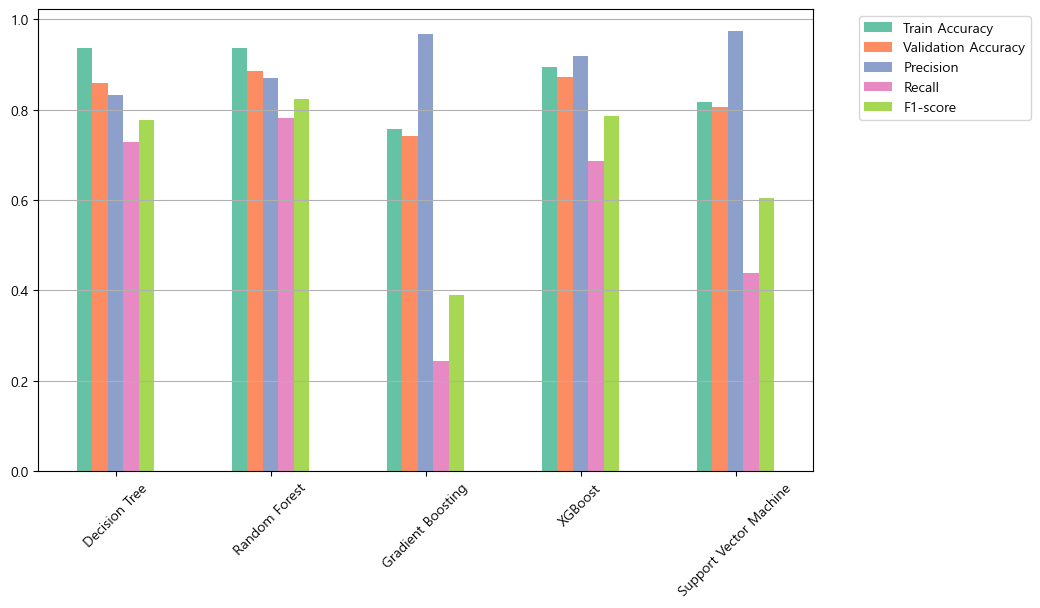

In [66]:
# 모델별 평가 지표 확인
sns.set_palette('Set2')
result.plot.bar(rot = 0, figsize = (10,6))
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(axis = 'y')
plt.show()